In [980]:
# import libraries
import pandas as pd
pd.set_option('display.max_colwidth', None) #setting max colwidth to view the entire dataset when using the print() command
import matplotlib.pyplot as plt
import numpy as np

In [981]:
# import the files
data = open("./dataset/breast-cancer.data")
feat = open("./dataset/breast-cancer.names")

data = data.read()
feat = feat.read()

In [982]:
# replace missing dataset attributes to NAN
data = data.replace('?','')

In [983]:
from io import StringIO

In [984]:
# convert data from str to dataframe
data = StringIO(data)
data = pd.read_csv(data, sep=",")

In [985]:
data.columns = ['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irrad']

In [986]:
data['class'] = data['class'].replace(['no-recurrence-events','recurrence-events'], [0,1])
data['age'] = data['age'].replace(['20-29', '30-39','40-49','50-59','60-69','70-79'],[0,1,2,3,4,5])
data['menopause'] = data['menopause'].replace(['premeno','ge40','lt40'],[0,1,2])
data['tumour_size'] = data['tumour_size'].replace(['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54'],[0,1,2,3,4,5,6,7,8,9,10])
data['inv_nodes'] = data['inv_nodes'].replace(['0-2','3-5','6-8','9-11','12-14','15-17','24-26'],[0,1,2,3,4,5,6])
data['node_caps'] = data['node_caps'].replace(['no','yes'],[0,1])
data['breast'] = data['breast'].replace(['left','right'],[0,1])
data['breast_quad'] = data['breast_quad'].replace(['left_low','left_up','right_up','right_low','central'],[0,1,2,3,4])
data['irrad'] = data['irrad'].replace(['no','yes'],[0,1])

In [987]:
# replace missing data 
data['node_caps'] = data['node_caps'].fillna(5)
data['breast_quad'] = data['breast_quad'].fillna(8)

In [988]:
X = data.drop(['class'], axis = 1)
y = data['class']

In [989]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [990]:
X_train['size_agg'] = X_train['tumour_size'] + X_train['deg_malig'] 
X_train['meta'] = X_train['irrad'] + X_train['deg_malig']

X_test['size_agg'] = X_test['tumour_size'] + X_test['deg_malig']
X_test['meta'] = X_test['irrad'] + X_test['deg_malig']

In [991]:
important_features = ['tumour_size', 'breast_quad', 'size_agg']
X_train = X_train[important_features]
X_test = X_test[important_features]

In [992]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score

from imblearn.over_sampling import RandomOverSampler

from IPython.display import display

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
model = DecisionTreeClassifier()


model.fit(X_resampled, y_resampled)

y_score = model.predict_proba(X_test)[:, 1]

y_pred = model.predict(X_test)




print('Acc:',model.score(X_train, y_train))
print('F1:',f1_score(y_test, y_pred, average='binary'))
print('ROC-AUC:',roc_auc_score(y_test, y_score))
print('Recc:',recall_score(y_test, y_pred))
print('Prec:',precision_score(y_test, y_pred))


Acc: 0.8026315789473685
F1: 0.6666666666666667
ROC-AUC: 0.7536764705882353
Recc: 0.7647058823529411
Prec: 0.5909090909090909


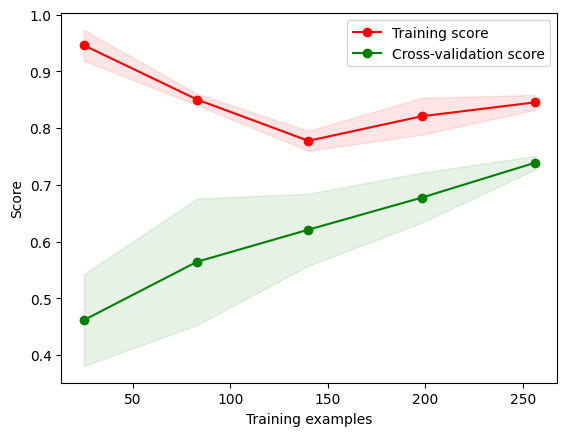

In [993]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(model, X_resampled, y_resampled, cv=5, scoring='f1_macro')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()